Machine Learning Models - Commodity Data

# Import Dependencies

In [11]:
# Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from datetime import datetime
from datetime import date
from datetime import timedelta
from scipy.stats import linregress
from scipy.stats import zscore
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
csv_file_train_model_all = os.path.join("all_return_train.csv")
csv_file_test_model_all = os.path.join("all_return_test.csv")
train_model_all_df = pd.read_csv(csv_file_train_model_all)
test_model_all_df = pd.read_csv(csv_file_test_model_all)
train_model_all_df.dropna()
test_model_all_df.dropna()
train_model_all_df.isnull().sum()


Unnamed: 0                0
Date                      0
Gold_Dly_Pct_Return       0
gold_MA_55                0
gold_MA_5                 0
                         ..
SPCtnsignal55_sigcode     0
SPcornsignal55_sigcode    0
SP_ret_code               0
Vix Daily Chg.            0
VIX                       0
Length: 100, dtype: int64

In [14]:
train_model_all_df.head()

,Unnamed: 0,Date,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,...,Vix Daily Chg._y,VIX_y,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code,Vix Daily Chg.,VIX
0,1,1998-05-01,-1.42,0.026909,-0.536,0.0295,2.16,0.191636,0.366,0.4995,...,-8.69,19.34,0,0,0,0,1,3,-8.69,19.34
1,2,1998-05-04,0.59,0.046000,-0.228,-0.0415,-0.12,0.194182,0.030,0.5485,...,5.07,20.32,0,0,1,0,1,2,5.07,20.32
2,3,1998-05-05,-0.26,0.034000,-0.164,-0.0720,-0.94,0.200727,-0.182,0.4785,...,5.61,21.46,0,0,1,1,1,1,5.61,21.46
3,4,1998-05-06,-0.98,0.028909,-0.650,-0.1305,-2.85,0.163273,-0.540,0.2710,...,6.20,22.79,0,0,1,1,1,1,6.20,22.79
4,5,1998-05-07,-0.69,0.018727,-0.552,-0.1505,-3.00,0.130364,-0.950,0.0855,...,2.63,23.39,0,0,1,1,1,4,2.63,23.39


In [15]:
training_master_df = train_model_all_df.reset_index().copy()
print(f"Training Start Date: {training_master_df.Date[0]}")
print(f"Training End Date: {training_master_df.Date[len(training_master_df)-1]}")
training_master_df = training_master_df.drop(columns=['Date'])
# training_master_df = training_master_df.drop(columns=['Unnamed: 0'])

training_master_df

Training Start Date: 1998-05-01
Training End Date: 2016-05-02


,index,Unnamed: 0,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,...,Vix Daily Chg._y,VIX_y,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code,Vix Daily Chg.,VIX
0,0,1,-1.42,0.026909,-0.536,0.0295,2.16,0.191636,0.366,0.4995,...,-8.69,19.34,0,0,0,0,1,3,-8.69,19.34
1,1,2,0.59,0.046000,-0.228,-0.0415,-0.12,0.194182,0.030,0.5485,...,5.07,20.32,0,0,1,0,1,2,5.07,20.32
2,2,3,-0.26,0.034000,-0.164,-0.0720,-0.94,0.200727,-0.182,0.4785,...,5.61,21.46,0,0,1,1,1,1,5.61,21.46
3,3,4,-0.98,0.028909,-0.650,-0.1305,-2.85,0.163273,-0.540,0.2710,...,6.20,22.79,0,0,1,1,1,1,6.20,22.79
4,4,5,-0.69,0.018727,-0.552,-0.1505,-3.00,0.130364,-0.950,0.0855,...,2.63,23.39,0,0,1,1,1,4,2.63,23.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,3803,3804,0.26,0.136364,-0.168,0.0310,-0.47,0.124545,0.166,0.0770,...,-0.85,13.96,0,1,0,0,0,3,-0.85,13.96
3804,3804,3805,0.56,0.083455,-0.058,0.0915,-1.14,0.114545,-0.192,0.0675,...,-1.36,13.77,0,1,0,0,0,1,-1.36,13.77
3805,3805,3806,1.34,0.106545,0.276,0.1295,0.52,0.168364,-0.204,0.1095,...,10.53,15.22,0,1,0,0,0,2,10.53,15.22
3806,3806,3807,1.90,0.147273,0.980,0.2735,2.36,0.222364,0.148,0.2735,...,3.15,15.70,0,1,0,0,0,4,3.15,15.70


In [16]:
training_master_df.head()

,index,Unnamed: 0,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,...,Vix Daily Chg._y,VIX_y,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code,Vix Daily Chg.,VIX
0,0,1,-1.42,0.026909,-0.536,0.0295,2.16,0.191636,0.366,0.4995,...,-8.69,19.34,0,0,0,0,1,3,-8.69,19.34
1,1,2,0.59,0.046000,-0.228,-0.0415,-0.12,0.194182,0.030,0.5485,...,5.07,20.32,0,0,1,0,1,2,5.07,20.32
2,2,3,-0.26,0.034000,-0.164,-0.0720,-0.94,0.200727,-0.182,0.4785,...,5.61,21.46,0,0,1,1,1,1,5.61,21.46
3,3,4,-0.98,0.028909,-0.650,-0.1305,-2.85,0.163273,-0.540,0.2710,...,6.20,22.79,0,0,1,1,1,1,6.20,22.79
4,4,5,-0.69,0.018727,-0.552,-0.1505,-3.00,0.130364,-0.950,0.0855,...,2.63,23.39,0,0,1,1,1,4,2.63,23.39


In [17]:
testing_master_df = test_model_all_df.reset_index().copy()
print(f"Testing Start Date: {testing_master_df.Date[0]}")
print(f"Testing End Date: {testing_master_df.Date[len(testing_master_df)-1]}")
testing_master_df = testing_master_df.drop(columns=['index','Date'])
testing_master_df = testing_master_df.drop(columns=['Unnamed: 0'])
testing_master_df.head()

Testing Start Date: 2016-05-03
Testing End Date: 2020-07-10


,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,cgr_Dly_Pct_Return,...,Vix Daily Chg._y,VIX_y,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code,Vix Daily Chg.,VIX
0,-0.31,0.080545,0.780,0.2530,-2.12,0.168727,-0.220,0.1895,0.001715,-1.82,...,6.27,15.60,1,1,0,0,0,2,6.27,15.60
1,-1.35,0.102000,0.398,0.2095,-1.47,0.122364,-0.286,0.1030,0.001713,-0.12,...,2.88,16.05,0,0,0,0,0,2,2.88,16.05
2,-0.16,0.094364,0.098,0.1455,-1.44,0.074545,-0.678,0.1875,0.001691,-1.28,...,-0.87,15.91,1,1,0,0,0,4,-0.87,15.91
3,1.71,0.103091,0.060,0.2050,-0.05,0.075455,-1.160,0.1595,0.001662,-1.72,...,-7.48,14.72,1,1,0,0,0,3,-7.48,14.72
4,-2.12,0.057818,-0.446,0.0420,-2.19,0.033091,-1.454,0.0415,0.001661,-0.07,...,-1.02,14.57,1,1,0,0,0,4,-1.02,14.57


In [18]:
training_master_df.corr()

,index,Unnamed: 0,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,...,Vix Daily Chg._y,VIX_y,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code,Vix Daily Chg.,VIX
index,1.000000,1.000000,-0.002022,-0.071596,-0.012209,-0.044168,-0.012240,-0.104273,-0.034486,-0.073247,...,0.001503,-0.286391,-0.049791,-0.025338,0.018721,-0.018519,-0.011167,0.054737,0.001503,-0.286391
Unnamed: 0,1.000000,1.000000,-0.002022,-0.071596,-0.012209,-0.044168,-0.012240,-0.104273,-0.034486,-0.073247,...,0.001503,-0.286391,-0.049791,-0.025338,0.018721,-0.018519,-0.011167,0.054737,0.001503,-0.286391
Gold_Dly_Pct_Return,-0.002022,-0.002022,1.000000,0.119187,0.449888,0.216302,0.287355,0.020075,0.120667,0.077215,...,-0.010994,0.017679,-0.005457,-0.024936,0.020073,-0.018229,-0.020110,-0.015337,-0.010994,0.017679
gold_MA_55,-0.071596,-0.071596,0.119187,1.000000,0.277712,0.542583,0.058349,0.322133,0.144551,0.254192,...,0.000436,0.066633,-0.045201,-0.011659,0.046141,-0.013657,0.031190,-0.014495,0.000436,0.066633
gold_MA_5,-0.012209,-0.012209,0.449888,0.277712,1.000000,0.488522,0.113711,0.038395,0.267255,0.160875,...,0.003784,0.035301,0.016725,-0.021643,-0.000336,-0.015350,-0.072582,-0.017122,0.003784,0.035301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPCtnsignal55_sigcode,-0.018519,-0.018519,-0.018229,-0.013657,-0.015350,-0.005707,-0.027977,-0.019344,-0.033995,-0.062710,...,0.014182,0.062121,0.087149,0.079338,0.134621,1.000000,0.060791,-0.001051,0.014182,0.062121
SPcornsignal55_sigcode,-0.011167,-0.011167,-0.020110,0.031190,-0.072582,0.011229,-0.030089,0.022932,-0.066671,-0.034219,...,0.007872,0.021788,0.103110,0.001698,0.137254,0.060791,1.000000,0.016517,0.007872,0.021788
SP_ret_code,0.054737,0.054737,-0.015337,-0.014495,-0.017122,-0.039740,-0.003438,0.026663,0.005032,0.000357,...,0.018853,-0.047862,-0.021760,-0.021820,0.022410,-0.001051,0.016517,1.000000,0.018853,-0.047862
Vix Daily Chg.,0.001503,0.001503,-0.010994,0.000436,0.003784,0.028517,-0.236189,-0.016131,-0.097365,-0.019701,...,1.000000,0.105609,0.048506,-0.000357,0.003001,0.014182,0.007872,0.018853,1.000000,0.105609


In [19]:
# testing_master_df.isnull().sum()
# testing_master_df['Settle'] = testing_master_df['Settle'].replace(np.nan, 0)
# testing_master_df.isnull().sum()
# testing_master_df.head()

# Data Loading and Machine Learning

In [20]:
# Assigning data to X and y

# Training Data
X_train = training_master_df[[
                              'Gold_Dly_Pct_Return',
                              'gold_MA_55',
                              'gold_MA_5',
                              'gold_MA_20',
                              'Copper_Dly_Pct_Return',
                              'copper_MA_55',
                              'copper_MA_5',
                              'copper_MA_20',
                              'cgr_Dly_Pct_Return',
                              'cgr_MA_5',
                              'crg_MA_20',
                              'crg_MA_55',
                              'Crude_Dly_Pct_Return',
                              'crude_MA_55',
                              'crude_MA_5',
                              'crude_MA_20',
                                    'LNH_Dly_Pct_Return',
                                'lnh_MA_55',
                                'lnh_MA_5',
                                'lnh_MA_20',
                                'SoyB_Dly_Pct_Return', 
                                'soyb_MA_55', 
                                'soyb_MA_5',
                                'soyb_MA_20',
                                    'Cotton_Dly_Pct_Return',
                                    'corn_Dly_Pct_Return',
                                    'corn_MA_55',
                                    'corn_MA_5',
                                    'corn_MA_20',
                                    'Vix Daily Chg.'                                    
                                ]]

y_train = training_master_df['SP_ret_code'].values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

# Testing Data
X_test = testing_master_df[[                             
                              'Gold_Dly_Pct_Return',
                              'gold_MA_55',
                              'gold_MA_5',
                              'gold_MA_20',
                              'Copper_Dly_Pct_Return',
                              'copper_MA_55',
                              'copper_MA_5',
                              'copper_MA_20',
                              'cgr_Dly_Pct_Return',
                              'cgr_MA_5',
                              'crg_MA_20',
                              'crg_MA_55',
                              'Crude_Dly_Pct_Return',
                              'crude_MA_55',
                              'crude_MA_5',
                              'crude_MA_20',
                                    'LNH_Dly_Pct_Return',
                                'lnh_MA_55',
                                'lnh_MA_5',
                                'lnh_MA_20',
                                'SoyB_Dly_Pct_Return', 
                                'soyb_MA_55', 
                                'soyb_MA_5',
                                'soyb_MA_20',
                                    'Cotton_Dly_Pct_Return',
                                    'corn_Dly_Pct_Return',
                                    'corn_MA_55',
                                    'corn_MA_5',
                                    'corn_MA_20',
                                    'Vix Daily Chg.'                               
                                   ]]

y_test = testing_master_df['SP_ret_code'].values.reshape(-1,1)
print(X_test.shape, y_test.shape)

(3808, 30) (3808, 1)
(1051, 30) (1051, 1)


In [21]:
X_train

,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,cgr_Dly_Pct_Return,cgr_MA_5,...,SoyB_Dly_Pct_Return,soyb_MA_55,soyb_MA_5,soyb_MA_20,Cotton_Dly_Pct_Return,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20,Vix Daily Chg.
0,-1.42,0.026909,-0.536,0.0295,2.16,0.191636,0.366,0.4995,3.63,9.220000e-01,...,0.82,-0.090545,-0.030,0.0090,0.18,-0.50,-0.174000,-0.606,-0.2365,-8.69
1,0.59,0.046000,-0.228,-0.0415,-0.12,0.194182,0.030,0.5485,-0.70,2.760000e-01,...,0.12,-0.093636,-0.036,0.0810,-1.21,0.80,-0.174182,-0.136,-0.1445,5.07
2,-0.26,0.034000,-0.164,-0.0720,-0.94,0.200727,-0.182,0.4785,-0.68,-2.420286e-15,...,0.81,-0.069636,0.280,0.1550,0.54,1.38,-0.145818,0.120,0.0155,5.61
3,-0.98,0.028909,-0.650,-0.1305,-2.85,0.163273,-0.540,0.2710,-1.89,1.180000e-01,...,1.00,-0.026000,0.512,0.2405,1.45,1.75,-0.099273,0.608,0.1175,6.20
4,-0.69,0.018727,-0.552,-0.1505,-3.00,0.130364,-0.950,0.0855,-2.32,-3.920000e-01,...,0.30,-0.026727,0.610,0.2295,3.41,-0.29,-0.102909,0.628,0.0885,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,0.26,0.136364,-0.168,0.0310,-0.47,0.124545,0.166,0.0770,-0.72,3.440000e-01,...,1.80,0.294364,0.664,0.5360,-0.33,1.44,0.086909,-0.086,0.1490,-0.85
3804,0.56,0.083455,-0.058,0.0915,-1.14,0.114545,-0.192,0.0675,-1.69,-1.220000e-01,...,0.12,0.307091,0.196,0.5800,0.50,-0.65,0.093455,-0.742,0.1925,-1.36
3805,1.34,0.106545,0.276,0.1295,0.52,0.168364,-0.204,0.1095,-0.81,-4.660000e-01,...,-0.10,0.303636,-0.002,0.5655,-0.72,1.69,0.129091,0.096,0.4890,10.53
3806,1.90,0.147273,0.980,0.2735,2.36,0.222364,0.148,0.2735,0.44,-8.280000e-01,...,0.29,0.311091,0.680,0.5390,0.13,0.13,0.135091,0.854,0.4675,3.15


In [22]:
y_train

array([[3],
       [2],
       [1],
       ...,
       [2],
       [4],
       [1]], dtype=int64)

In [23]:
X_test

,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,cgr_Dly_Pct_Return,cgr_MA_5,...,SoyB_Dly_Pct_Return,soyb_MA_55,soyb_MA_5,soyb_MA_20,Cotton_Dly_Pct_Return,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20,Vix Daily Chg.
0,-0.31,0.080545,0.780,0.2530,-2.12,0.168727,-0.220,0.1895,-1.82,-1.002,...,-1.35,0.290364,0.076,0.6165,-2.04,-3.06,0.088182,-0.378,0.2830,6.27
1,-1.35,0.102000,0.398,0.2095,-1.47,0.122364,-0.286,0.1030,-0.12,-0.688,...,0.29,0.281091,0.110,0.6130,-0.44,-0.79,0.052545,-0.406,0.2330,2.88
2,-0.16,0.094364,0.098,0.1455,-1.44,0.074545,-0.678,0.1875,-1.28,-0.782,...,-2.05,0.238182,-0.280,0.5300,-1.58,-0.80,0.019455,-0.904,0.1480,-0.87
3,1.71,0.103091,0.060,0.2050,-0.05,0.075455,-1.160,0.1595,-1.72,-1.214,...,2.27,0.285091,0.116,0.5760,0.52,1.00,0.046182,-0.730,0.1845,-7.48
4,-2.12,0.057818,-0.446,0.0420,-2.19,0.033091,-1.454,0.0415,-0.07,-1.002,...,-0.73,0.274909,-0.314,0.4770,-0.76,-2.25,0.007818,-1.180,0.1440,-1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,0.22,0.091273,0.278,0.3530,1.02,0.354545,0.824,0.4090,0.80,0.548,...,0.67,0.132364,0.764,0.1755,0.03,0.87,0.118000,1.674,0.1730,0.94
1047,0.93,0.141818,0.348,0.3340,0.83,0.327091,0.780,0.4310,-0.10,0.434,...,-0.36,0.135091,0.658,0.1750,0.27,-0.87,0.085455,0.904,0.0885,5.33
1048,0.68,0.140545,0.268,0.3185,0.97,0.363636,0.728,0.4140,0.29,0.464,...,-0.06,0.147091,0.236,0.1805,1.30,0.80,0.138727,0.288,0.2060,-4.59
1049,-0.89,0.151091,0.302,0.2775,0.50,0.443636,0.788,0.3285,1.40,0.488,...,0.39,0.144909,0.100,0.1870,-1.05,0.72,0.180000,-0.096,0.2610,4.20


In [24]:
y_test

array([[2],
       [2],
       [4],
       ...,
       [1],
       [4],
       [1]], dtype=int64)

Scaling the data for models

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

LINEAR REGRESSION

In [26]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: -0.04887973246676425
Testing Score: -0.08995584600212614


In [28]:
y_test_scaled.shape

(1051, 1)

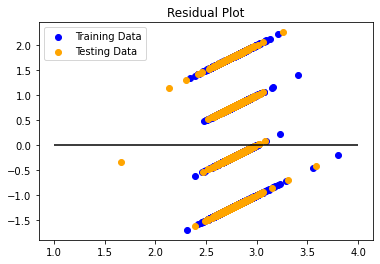

In [29]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 7.994271999690492, R2: -9.27290839838879


In [31]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# # plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
# plt.title("Residual Plot")
# plt.xlabel("Predicted value")
# plt.ylabel("Prediction error")
# plt.show()
### END SOLUTION

In [32]:
csv_file_train_model_coded = os.path.join("model_coded_train_df.csv")
csv_file_test_model_coded = os.path.join("model_coded_test_df.csv")
train_model_coded_df = pd.read_csv(csv_file_train_model_coded)
test_model_coded_df = pd.read_csv(csv_file_test_model_coded)

In [33]:
train_model_coded_df.head()

,Unnamed: 0,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
0,1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,...,0,0,-8.69,19.34,0,0,0,0,1,3
1,2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,...,0,0,5.07,20.32,0,0,1,0,1,2
2,3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,...,0,0,5.61,21.46,0,0,1,1,1,1
3,4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,...,2,0,6.20,22.79,0,0,1,1,1,1
4,5,1998-05-07,0.060825,0.010146,0.048143,0.106433,-0.086141,0.0,0.186793,0.015880,...,2,2,2.63,23.39,0,0,1,1,1,4


In [34]:
train_model_coded_df = train_model_coded_df.drop(columns=['Date','SP_ret_code','Unnamed: 0'])
test_model_coded_df = test_model_coded_df.drop(columns=['Date'])

KNN

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_scaler = StandardScaler().fit(X_train)

In [36]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 1, Train/Test Score: 1.000/0.268


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 3, Train/Test Score: 0.594/0.228


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 5, Train/Test Score: 0.540/0.261


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 7, Train/Test Score: 0.500/0.269


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.475/0.291


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 11, Train/Test Score: 0.457/0.293


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 13, Train/Test Score: 0.453/0.311


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 15, Train/Test Score: 0.445/0.313


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 17, Train/Test Score: 0.439/0.327


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 19, Train/Test Score: 0.446/0.325


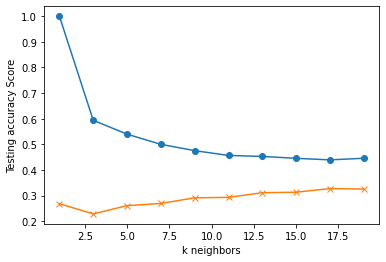

In [37]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 21, 2), train_scores, marker='o')
plt.plot(range(1, 21, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test.ravel()))

C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k=17 Test Acc: 0.327


In [39]:
#retrain model using optimal
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

#plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
# plot_confusion_matrix(KNeighborsClassifier, X_test_scaled, X_test_scaled, cmap=plt.cm.Blues, display_labels=["purple", "yellow"])

# plt.show()

              precision    recall  f1-score   support

           1       0.16      0.13      0.14       137
           2       0.22      0.13      0.16       247
           3       0.35      0.12      0.18       273
           4       0.37      0.66      0.48       394

    accuracy                           0.33      1051
   macro avg       0.27      0.26      0.24      1051
weighted avg       0.30      0.33      0.28      1051



RANDOM FOREST

In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test, y_test)

0.2797335870599429

In [42]:
rf = RandomForestClassifier(n_estimators=210)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.37012369172216936

In [43]:
feature_names = X_train.columns

In [44]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.036460625839187494, 'Vix Daily Chg.'),
 (0.03537859357414426, 'LNH_Dly_Pct_Return'),
 (0.03479322591057512, 'Cotton_Dly_Pct_Return'),
 (0.0347170105122793, 'corn_MA_55'),
 (0.034548345845386026, 'crude_MA_55'),
 (0.03437554560966788, 'crude_MA_5'),
 (0.034355162734854325, 'Crude_Dly_Pct_Return'),
 (0.034074762896829175, 'soyb_MA_55'),
 (0.033916344289401774, 'lnh_MA_55'),
 (0.033912393629128686, 'lnh_MA_20'),
 (0.0338574191808686, 'lnh_MA_5'),
 (0.03378775332823892, 'corn_Dly_Pct_Return'),
 (0.03360380689403337, 'corn_MA_5'),
 (0.03346706238720228, 'SoyB_Dly_Pct_Return'),
 (0.03346093947487399, 'crude_MA_20'),
 (0.033068486495104014, 'gold_MA_5'),
 (0.032974664825535946, 'crg_MA_55'),
 (0.03290848968119817, 'soyb_MA_5'),
 (0.03288264165684136, 'copper_MA_55'),
 (0.03279723248167119, 'Gold_Dly_Pct_Return'),
 (0.03277807785673376, 'cgr_MA_5'),
 (0.032738683770375976, 'gold_MA_55'),
 (0.032734814768343556, 'gold_MA_20'),
 (0.03260345270055003, 'cgr_Dly_Pct_Return'),
 (0.03235262447639